In [1]:
import pandas as pd

data = pd.read_excel("C:/Users/tnfus/Desktop/프로야구타자/연봉0125.xlsx")
df = pd.DataFrame(data)

In [2]:
import pandas as pd

# 전년도 데이터프레임 생성
df_prev = df.copy()
df_prev['Year'] += 1
df_prev = df_prev.rename(columns={'Salary': 'Prev_Salary'})

# 1차 merge
df_merged = pd.merge(df, df_prev[['Name', 'Year', 'Prev_Salary']],
                     on=['Name', 'Year'], how='left')

# 결측치가 있는 경우, 더 과거 연봉으로 채움
def fill_prev_salary(row, df_all):
    if pd.notnull(row['Prev_Salary']):
        return row['Prev_Salary']
    
    name = row['Name']
    year = row['Year']
    
    # 해당 선수의 더 과거 연봉 찾기 (내림차순 정렬)
    past_salaries = df_all[(df_all['Name'] == name) & (df_all['Year'] < year)]
    past_salaries = past_salaries.sort_values(by='Year', ascending=False)
    
    for _, r in past_salaries.iterrows():
        if pd.notnull(r['Salary']):
            return r['Salary']
    
    return None  # 과거에도 연봉 정보가 없으면 그대로 NaN

# 적용
df_merged['Prev_Salary'] = df_merged.apply(lambda row: fill_prev_salary(row, df), axis=1)

print(df_merged)



       Year    Team Name Salary Prev_Salary
0      2003     KIA  가내영      -           -
1      2002     KIA  가내영      -           -
2      2001     KIA  가내영      -        None
3      2006   LOTTE  가득염   8000        8000
4      2005   LOTTE  가득염   8000        8000
...     ...     ...  ...    ...         ...
14169  2014   LOTTE  황진수   2500        2700
14170  2013   LOTTE  황진수   2700        2400
14171  2012   LOTTE  황진수   2400        None
14172  2011  DOOSAN  황필선   2400        None
14173  2025  DOOSAN  황희천   3000        None

[14174 rows x 5 columns]


In [11]:
df_merged.to_csv("C:/Users/tnfus/Desktop/프로야구타자/연봉0125_1.csv", encoding = 'euc-kr')

In [15]:
df1 = pd.read_excel("C:/Users/tnfus/Desktop/프로야구타자/0124_한국타자_FA.xlsx")
df2 = pd.read_csv("C:/Users/tnfus/Desktop/프로야구타자/연봉0125-1.csv", encoding = 'euc-kr')

In [16]:
df_merged = pd.merge(df1, df2, on=['Year', 'Name', 'Team'], how='outer')

In [17]:
df_merged.to_csv("C:/Users/tnfus/Desktop/프로야구타자/연봉기록0125.csv", encoding = 'euc-kr')

In [3]:
df = pd.read_csv("C:/Users/tnfus/Desktop/프로야구타자/연봉기록0125_1.csv", encoding = 'euc-kr')

In [4]:
import pandas as pd
import numpy as np

# Year 기준 정렬
df = df.sort_values(by=['Name', 'Year'])

# 선수별로 처리
def fill_prev_salary(group):
    group = group.copy()
    # 현재 연도 기준 이전 Salary 값을 shift해서 만들기 (직전 연도 연봉)
    group['Salary_shifted'] = group['Salary'].shift(1)
    # Prev_Salary가 NaN일 경우 Salary_shifted 값으로 채움
    group['Prev_Salary'] = group['Prev_Salary'].fillna(group['Salary_shifted'])
    return group.drop(columns='Salary_shifted')

# 적용
df = df.groupby('Name', group_keys=False).apply(fill_prev_salary)

print(df)


     Name  Year    Team  Salary  Prev_Salary is_rookie FA  Birth  Age  \
8     강경학  2011  HANWHA  2400.0          NaN         O  X   1992   19   
7     강경학  2014  HANWHA  4000.0       2400.0         X  X   1992   22   
6     강경학  2015  HANWHA  6500.0       4000.0         X  X   1992   23   
5     강경학  2016  HANWHA  6200.0       6500.0         X  X   1992   24   
4     강경학  2017  HANWHA  5800.0       6200.0         X  X   1992   25   
...   ...   ...     ...     ...          ...       ... ..    ...  ...   
5712  황진수  2015   LOTTE  2800.0       2900.0         X  X   1989   26   
5711  황진수  2016   LOTTE  2800.0       2800.0         X  X   1989   27   
5710  황진수  2017   LOTTE  6200.0       2800.0         X  X   1989   28   
5709  황진수  2018   LOTTE  4000.0       6200.0         X  X   1989   29   
5708  황진수  2019   LOTTE     NaN       4000.0       NaN  X   1989   30   

     Position  ...  SO  GDP  SH  SF    AVG    OBP    SLG    OPS  R/ePA   wRC+  
8          3B  ...   1    0   0   0  0.000 

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_19336\4109565893.py:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Name', group_keys=False).apply(fill_prev_salary)


In [5]:
# 연도 기준 오름차순 정렬 (미래 연봉 가져오기 위해)
df = df.sort_values(by=['Name', 'Year'])

# 선수별로 연봉이 결측이면 다음 연도 연봉으로 채우기 (bfill)
df['Salary'] = df.groupby('Name')['Salary'].bfill()

In [27]:
df.to_csv("C:/Users/tnfus/Desktop/프로야구타자/연봉기록0125_2.csv", encoding = 'euc-kr')

In [34]:
df = pd.read_csv("C:/Users/tnfus/Desktop/프로야구타자/0123타자.csv", encoding = 'euc-kr')

In [35]:
df.columns

Index(['Name', 'Year', 'Team', 'Salary', 'Prev_Salary', 'is_rookie', 'FA',
       'Birth', 'Age', 'Position', 'WAR', 'G', 'oWAR', 'dWAR', 'PA', 'ePA',
       'AB', 'R', 'H', '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HP',
       'IB', 'SO', 'GDP', 'SH', 'SF', 'AVG', 'OBP', 'SLG', 'OPS', 'R/ePA',
       'wRC+'],
      dtype='object')

In [36]:
X = df[features]


In [37]:
# 범주형 처리
categorical_cols = ['Team', 'is_rookie', 'FA', 'Position']
for col in categorical_cols:
    df[col] = df[col].astype(str)
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# 학습용 데이터 구성
X = df[features]
y = df[target]

# train/val 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습 (예시)
model_xgb = xgb.XGBRegressor(n_estimators=200, max_depth=4)
model_xgb.fit(X_train, y_train)

model_lgb = lgb.LGBMRegressor(n_estimators=200, max_depth=4)
model_lgb.fit(X_train, y_train)

model_cat = CatBoostRegressor(iterations=200, depth=4, verbose=0)
model_cat.fit(X_train, y_train)

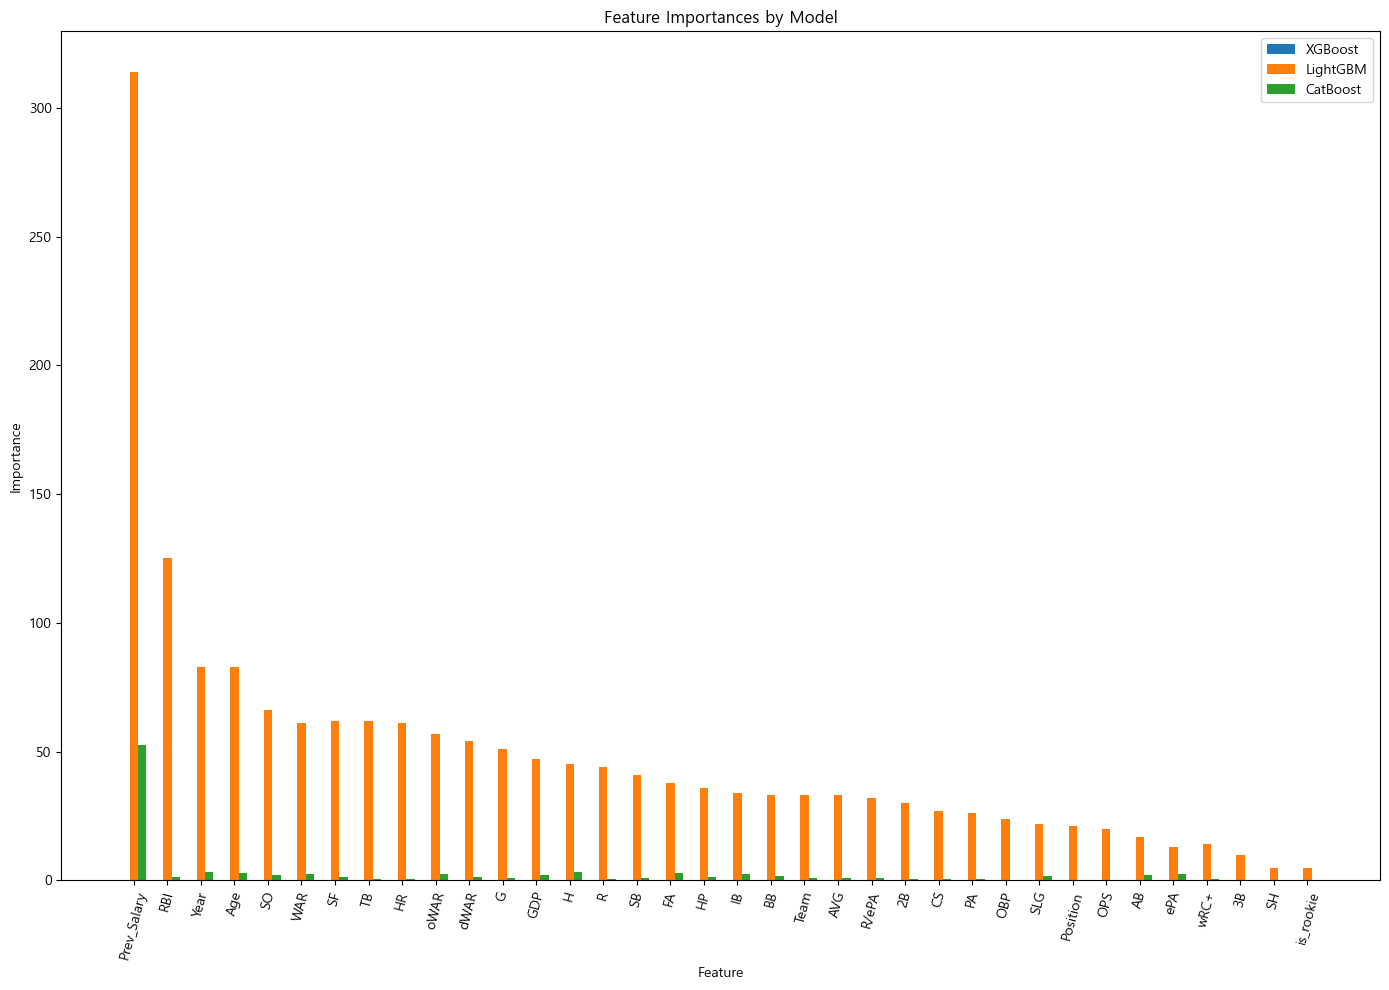

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
import matplotlib.pyplot as plt
# 🎯 예시용 피처들 (원하는 대로 수정 가능)
features = ['Year', 'Team', 'Prev_Salary', 'is_rookie', 'FA',
           'Age', 'Position', 'WAR', 'G', 'oWAR', 'dWAR', 'PA', 'ePA',
           'AB', 'R', 'H', '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HP',
           'IB', 'SO', 'GDP', 'SH', 'SF', 'AVG', 'OBP', 'SLG', 'OPS', 'R/ePA',
           'wRC+']
target = 'Salary'

# 1. 결측치 일단 그대로 두기 (트리 모델들은 NaN 처리 가능)
X = df[features].copy()
y = df[target]
# ✅ X에서 피처 이름 추출
feature_names = X.columns.tolist()

# 1. XGBoost 중요도
xgb_importance = model_xgb.feature_importances_

# 2. LightGBM 중요도
lgb_importance = model_lgb.feature_importances_

# 3. CatBoost 중요도
cat_importance = model_cat.get_feature_importance()

# 정리해서 데이터프레임으로
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'XGBoost': xgb_importance,
    'LightGBM': lgb_importance,
    'CatBoost': cat_importance
})

# 평균 중요도 기준 정렬
importance_df['Mean_Importance'] = importance_df[['XGBoost', 'LightGBM', 'CatBoost']].mean(axis=1)
importance_df = importance_df.sort_values(by='Mean_Importance', ascending=False)

# 전체 피처 시각화 (Top 20 → 전체로 변경)
plt.figure(figsize=(14, 10))
bar_width = 0.25
index = np.arange(len(importance_df))

plt.bar(index, importance_df['XGBoost'], bar_width, label='XGBoost')
plt.bar(index + bar_width, importance_df['LightGBM'], bar_width, label='LightGBM')
plt.bar(index + 2 * bar_width, importance_df['CatBoost'], bar_width, label='CatBoost')

plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances by Model')
plt.xticks(index + bar_width, importance_df['Feature'], rotation=75)
plt.legend()
plt.tight_layout()
plt.show()


In [39]:
# 정규화 대상 컬럼
models = ['XGBoost', 'LightGBM', 'CatBoost']

# 정규화 복사본 생성
normalized_df = importance_df.copy()

# 각 모델별로 max 기준 정규화 (0~1)
for model in models:
    max_val = normalized_df[model].max()
    if max_val != 0:
        normalized_df[model] = normalized_df[model] / max_val
    else:
        normalized_df[model] = 0

# 평균 중요도 다시 계산
normalized_df['Mean_Importance'] = normalized_df[models].mean(axis=1)

# 중요도 기준 전체 정렬
normalized_df = normalized_df.sort_values(by='Mean_Importance', ascending=False)


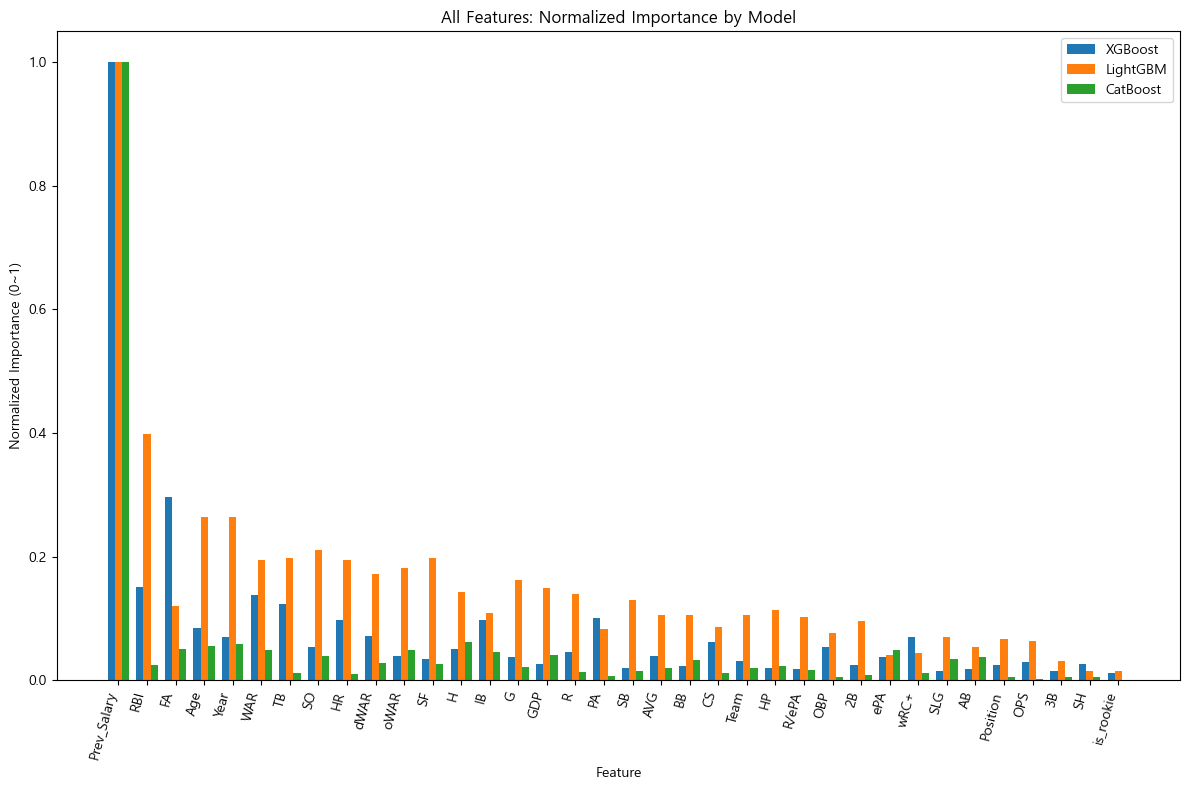

In [40]:
import matplotlib.pyplot as plt
import numpy as np

n_features = len(normalized_df)
index = np.arange(n_features)
bar_width = 0.25

plt.figure(figsize=(max(12, n_features * 0.3), 8))  # 피처 수에 따라 그래프 폭 조절

plt.bar(index, normalized_df['XGBoost'], bar_width, label='XGBoost')
plt.bar(index + bar_width, normalized_df['LightGBM'], bar_width, label='LightGBM')
plt.bar(index + 2 * bar_width, normalized_df['CatBoost'], bar_width, label='CatBoost')

plt.xlabel('Feature')
plt.ylabel('Normalized Importance (0~1)')
plt.title('All Features: Normalized Importance by Model')
plt.xticks(index + bar_width, normalized_df['Feature'], rotation=75, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"📊 {model_name}")
    print(f"   🔹 RMSE : {rmse:,.0f}원")
    print(f"   🔹 MAE  : {mae:,.0f}원")
    print(f"   🔹 R²    : {r2:.4f}")
    print("")

# 예측값 준비
pred_xgb = model_xgb.predict(X_val)
pred_lgb = model_lgb.predict(X_val)
pred_cat = model_cat.predict(X_val)

# 평가
evaluate_model(y_val, pred_xgb, "XGBoost")
evaluate_model(y_val, pred_lgb, "LightGBM")
evaluate_model(y_val, pred_cat, "CatBoost")


📊 XGBoost
   🔹 RMSE : 14,831원
   🔹 MAE  : 4,591원
   🔹 R²    : 0.6759

📊 LightGBM
   🔹 RMSE : 14,124원
   🔹 MAE  : 4,253원
   🔹 R²    : 0.7061

📊 CatBoost
   🔹 RMSE : 14,851원
   🔹 MAE  : 4,472원
   🔹 R²    : 0.6751



In [42]:
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import numpy as np

# 데이터 분할 (혹시 모를 경우를 대비해 다시 확인)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 🎯 Optuna 목적 함수
def objective(trial):
    param = {
        'verbosity': 0,
        'objective': 'reg:squarederror',
        'eval_metric': 'rmse',
        'tree_method': 'hist',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5)
    }

    model = xgb.XGBRegressor(**param)
    model.fit(X_train, y_train)
    pred = model.predict(X_val)

    # ✅ 여기가 수정된 부분
    rmse = np.sqrt(mean_squared_error(y_val, pred))
    return rmse

# ✅ Optuna 실행 (이게 빠져있었음!)
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)  # 시도 횟수 조절 가능


[I 2025-04-16 15:03:36,062] A new study created in memory with name: no-name-0ac4fa1b-85e1-46d3-a364-64d1ade2bd5c
[I 2025-04-16 15:03:36,288] Trial 0 finished with value: 14185.852106940914 and parameters: {'max_depth': 5, 'learning_rate': 0.13260996414861223, 'n_estimators': 281, 'subsample': 0.9023932775653968, 'colsample_bytree': 0.7577880874421495, 'reg_alpha': 1.6501469395607726, 'reg_lambda': 1.930477031185727}. Best is trial 0 with value: 14185.852106940914.
[I 2025-04-16 15:03:37,973] Trial 1 finished with value: 13621.013765502184 and parameters: {'max_depth': 10, 'learning_rate': 0.19812914445703217, 'n_estimators': 327, 'subsample': 0.9598160609742203, 'colsample_bytree': 0.9343355989844506, 'reg_alpha': 2.698440823301848, 'reg_lambda': 4.371339164357805}. Best is trial 1 with value: 13621.013765502184.
[I 2025-04-16 15:03:38,208] Trial 2 finished with value: 13698.065848870781 and parameters: {'max_depth': 5, 'learning_rate': 0.07039103588159877, 'n_estimators': 301, 'subsa

In [43]:
print("💡 Best trial:")
print(study.best_trial)

# 또는
best_params = study.best_params
print("🎯 Best Params:", best_params)

💡 Best trial:
FrozenTrial(number=21, state=1, values=[13619.882525190884], datetime_start=datetime.datetime(2025, 4, 16, 15, 3, 48, 990747), datetime_complete=datetime.datetime(2025, 4, 16, 15, 3, 50, 489825), params={'max_depth': 10, 'learning_rate': 0.03910680418706281, 'n_estimators': 346, 'subsample': 0.9994139273754058, 'colsample_bytree': 0.6424246088043053, 'reg_alpha': 2.7178723841329524, 'reg_lambda': 3.6024072328802754}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=10, log=False, low=3, step=1), 'learning_rate': FloatDistribution(high=0.3, log=False, low=0.01, step=None), 'n_estimators': IntDistribution(high=500, log=False, low=100, step=1), 'subsample': FloatDistribution(high=1.0, log=False, low=0.6, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.6, step=None), 'reg_alpha': FloatDistribution(high=5.0, log=False, low=0.0, step=None), 'reg_lambda': FloatDistribution(high=5.0, log=False, l

In [46]:
best_params = {
    'max_depth': 10,
    'learning_rate': 0.03910680418706281,
    'n_estimators': 346,
    'subsample': 0.9994139273754058,
    'colsample_bytree': 0.6424246088043053,
    'reg_alpha': 2.7178723841329524,
    'reg_lambda': 3.6024072328802754
}

In [47]:
from sklearn.metrics import mean_absolute_error, r2_score

# 모델 학습
model_xgb_best = xgb.XGBRegressor(
    **best_params,
    objective='reg:squarederror',
    tree_method='hist',
    verbosity=0
)

model_xgb_best.fit(X_train, y_train)
pred = model_xgb_best.predict(X_val)

# 성능 평가
rmse = np.sqrt(mean_squared_error(y_val, pred))
mae = mean_absolute_error(y_val, pred)
r2 = r2_score(y_val, pred)

print("\n📊 튜닝된 XGBoost 성능:")
print(f"   🔹 RMSE : {rmse:,.0f}원")
print(f"   🔹 MAE  : {mae:,.0f}원")
print(f"   🔹 R²    : {r2:.4f}")


📊 튜닝된 XGBoost 성능:
   🔹 RMSE : 13,620원
   🔹 MAE  : 4,344원
   🔹 R²    : 0.7267


In [48]:
import lightgbm as lgb
import optuna
from sklearn.metrics import mean_squared_error

# 🎯 목적 함수
def objective_lgb(trial):
    param = {
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5)
    }

    model = lgb.LGBMRegressor(**param)
    model.fit(X_train, y_train, categorical_feature=[X.columns.get_loc(c) for c in categorical_cols])
    pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, pred))
    return rmse

# Optuna 튜닝 실행
study_lgb = optuna.create_study(direction='minimize')
study_lgb.optimize(objective_lgb, n_trials=30)


[I 2025-04-16 15:06:12,979] A new study created in memory with name: no-name-d0d46657-4e48-496c-aa3a-3f57d469b7b4
[I 2025-04-16 15:06:13,173] Trial 0 finished with value: 15086.47813828711 and parameters: {'max_depth': 9, 'learning_rate': 0.2378610890182599, 'n_estimators': 349, 'subsample': 0.7635744500135423, 'colsample_bytree': 0.6542475119914688, 'reg_alpha': 4.18900533629175, 'reg_lambda': 1.1135417089651574}. Best is trial 0 with value: 15086.47813828711.
[I 2025-04-16 15:06:13,331] Trial 1 finished with value: 14174.983686070696 and parameters: {'max_depth': 8, 'learning_rate': 0.03166537114723649, 'n_estimators': 310, 'subsample': 0.9945449033123239, 'colsample_bytree': 0.6381481124010242, 'reg_alpha': 4.946567558783718, 'reg_lambda': 3.2794557197612875}. Best is trial 1 with value: 14174.983686070696.
[I 2025-04-16 15:06:13,415] Trial 2 finished with value: 15160.719807529495 and parameters: {'max_depth': 3, 'learning_rate': 0.15350706287446722, 'n_estimators': 460, 'subsample

In [49]:
from catboost import CatBoostRegressor

def objective_cat(trial):
    param = {
        'loss_function': 'RMSE',
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'iterations': trial.suggest_int('iterations', 100, 500),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'random_strength': trial.suggest_float('random_strength', 1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'verbose': 0
    }

    model = CatBoostRegressor(**param)
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, pred))
    return rmse

# Optuna 실행
study_cat = optuna.create_study(direction='minimize')
study_cat.optimize(objective_cat, n_trials=30)


[I 2025-04-16 15:06:19,500] A new study created in memory with name: no-name-3104067d-d80e-44c7-a034-9d7db73966ea
[I 2025-04-16 15:06:19,792] Trial 0 finished with value: 15422.344027944746 and parameters: {'depth': 4, 'learning_rate': 0.15926809413221082, 'iterations': 268, 'l2_leaf_reg': 3.743419762000981, 'random_strength': 7.617410995185782, 'bagging_temperature': 0.6408844234021056}. Best is trial 0 with value: 15422.344027944746.
[I 2025-04-16 15:06:20,314] Trial 1 finished with value: 14579.681603136867 and parameters: {'depth': 6, 'learning_rate': 0.29909895863616026, 'iterations': 281, 'l2_leaf_reg': 3.70767476702767, 'random_strength': 7.713996669052675, 'bagging_temperature': 0.9261521824474588}. Best is trial 1 with value: 14579.681603136867.
[I 2025-04-16 15:06:22,015] Trial 2 finished with value: 14143.088392942545 and parameters: {'depth': 8, 'learning_rate': 0.20468235271890164, 'iterations': 287, 'l2_leaf_reg': 4.9804810612961035, 'random_strength': 7.717006053879733, 

In [50]:
import optuna
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
results = []

# ✅ XGBoost (미리 튜닝된 study.best_params 사용)
model_xgb_best = xgb.XGBRegressor(
    **study.best_params,
    objective='reg:squarederror',
    tree_method='hist',
    verbosity=0
)
model_xgb_best.fit(X_train, y_train)
pred_xgb = model_xgb_best.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, pred_xgb))
mae = mean_absolute_error(y_val, pred_xgb)
r2 = r2_score(y_val, pred_xgb)

results.append({'Model': 'XGBoost', 'RMSE': rmse, 'MAE': mae, 'R2': r2})

# ✅ LightGBM 튜닝
def objective_lgb(trial):
    param = {
        'objective': 'regression',
        'metric': 'rmse',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5)
    }
    model = lgb.LGBMRegressor(**param)
    model.fit(X_train, y_train, categorical_feature=[X.columns.get_loc(c) for c in categorical_cols])
    pred = model.predict(X_val)
    return np.sqrt(mean_squared_error(y_val, pred))

study_lgb = optuna.create_study(direction='minimize')
study_lgb.optimize(objective_lgb, n_trials=30)

model_lgb_best = lgb.LGBMRegressor(**study_lgb.best_params)
model_lgb_best.fit(X_train, y_train, categorical_feature=[X.columns.get_loc(c) for c in categorical_cols])
pred_lgb = model_lgb_best.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, pred_lgb))
mae = mean_absolute_error(y_val, pred_lgb)
r2 = r2_score(y_val, pred_lgb)

results.append({'Model': 'LightGBM', 'RMSE': rmse, 'MAE': mae, 'R2': r2})

# ✅ CatBoost 튜닝
def objective_cat(trial):
    param = {
        'loss_function': 'RMSE',
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'iterations': trial.suggest_int('iterations', 100, 500),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'random_strength': trial.suggest_float('random_strength', 1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'verbose': 0
    }
    model = CatBoostRegressor(**param)
    model.fit(X_train, y_train)
    pred = model.predict(X_val)
    return np.sqrt(mean_squared_error(y_val, pred))

study_cat = optuna.create_study(direction='minimize')
study_cat.optimize(objective_cat, n_trials=30)

model_cat_best = CatBoostRegressor(**study_cat.best_params, verbose=0)
model_cat_best.fit(X_train, y_train)
pred_cat = model_cat_best.predict(X_val)

rmse = np.sqrt(mean_squared_error(y_val, pred_cat))
mae = mean_absolute_error(y_val, pred_cat)
r2 = r2_score(y_val, pred_cat)

results.append({'Model': 'CatBoost', 'RMSE': rmse, 'MAE': mae, 'R2': r2})

# ✅ 결과 정리 출력
result_df = pd.DataFrame(results).sort_values(by='R2', ascending=False)
print("\n📈 튜닝된 모델 성능 비교")
print(result_df.to_string(index=False))



[I 2025-04-16 15:09:30,757] A new study created in memory with name: no-name-14390338-f363-4ad0-a684-fffa68f3e29c
[I 2025-04-16 15:09:30,937] Trial 0 finished with value: 15191.402442338142 and parameters: {'max_depth': 10, 'learning_rate': 0.1113646269680055, 'n_estimators': 347, 'subsample': 0.6026872621869667, 'colsample_bytree': 0.6634961878276469, 'reg_alpha': 0.18906393733955862, 'reg_lambda': 0.4978092867078854}. Best is trial 0 with value: 15191.402442338142.
[I 2025-04-16 15:09:31,165] Trial 1 finished with value: 14003.142117226662 and parameters: {'max_depth': 9, 'learning_rate': 0.013215731102789488, 'n_estimators': 397, 'subsample': 0.7866173779831781, 'colsample_bytree': 0.7322476509509727, 'reg_alpha': 3.522268506686857, 'reg_lambda': 1.9914682043942056}. Best is trial 1 with value: 14003.142117226662.
[I 2025-04-16 15:09:31,319] Trial 2 finished with value: 14334.59772645731 and parameters: {'max_depth': 6, 'learning_rate': 0.033196907684553426, 'n_estimators': 412, 'su


📈 튜닝된 모델 성능 비교
   Model         RMSE         MAE       R2
CatBoost 13468.881565 4096.037201 0.732731
 XGBoost 13619.882525 4343.931641 0.726704
LightGBM 14003.142117 4141.476510 0.711107


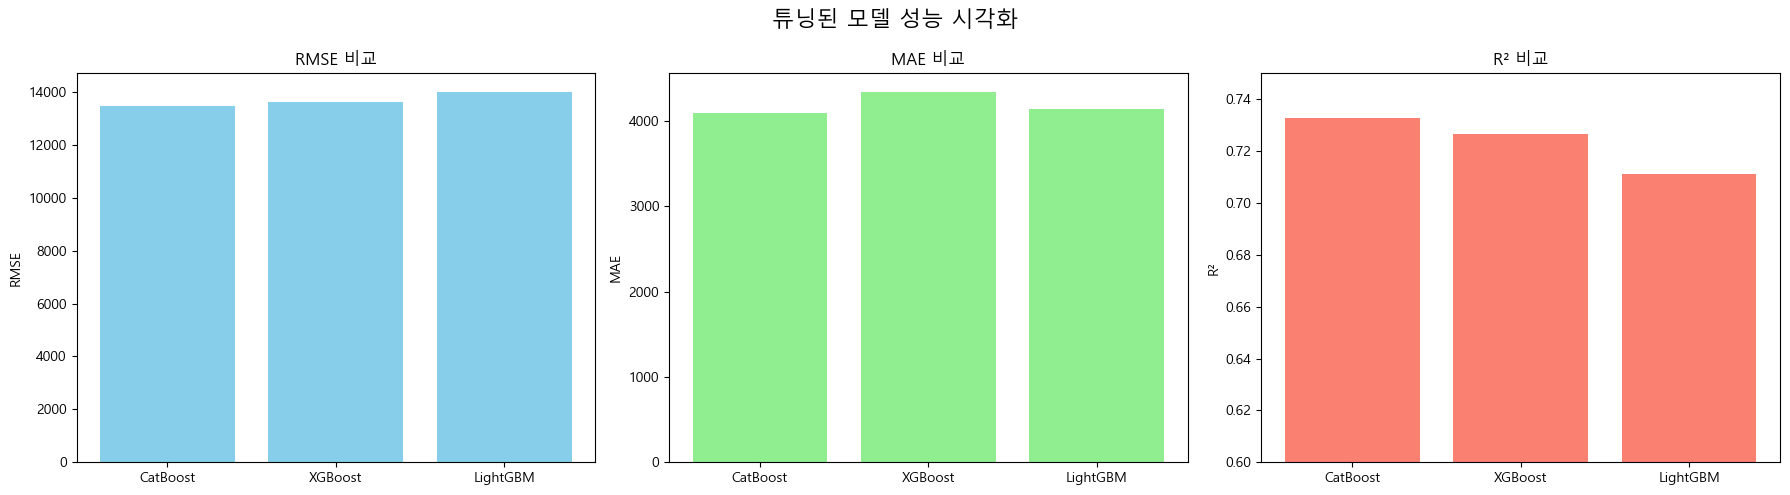

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib
import platform

# 한글 폰트 설정
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')

# 음수 깨짐 방지
matplotlib.rcParams['axes.unicode_minus'] = False
# 결과 테이블 다시 정의
result_df = pd.DataFrame({
    'Model': ['CatBoost', 'XGBoost', 'LightGBM'],
    'RMSE': [13468.88, 13619.88, 14003.14],
    'MAE': [4096.04, 4343.93, 4141.48],
    'R2': [0.7327, 0.7267, 0.7111]
})

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# RMSE
axes[0].bar(result_df['Model'], result_df['RMSE'], color='skyblue')
axes[0].set_title('RMSE 비교')
axes[0].set_ylabel('RMSE')

# MAE
axes[1].bar(result_df['Model'], result_df['MAE'], color='lightgreen')
axes[1].set_title('MAE 비교')
axes[1].set_ylabel('MAE')

# R²
axes[2].bar(result_df['Model'], result_df['R2'], color='salmon')
axes[2].set_title('R² 비교')
axes[2].set_ylabel('R²')
axes[2].set_ylim(0.60, 0.75)

plt.suptitle('튜닝된 모델 성능 시각화', fontsize=16)
plt.tight_layout()
plt.show()


In [53]:
df_test = pd.read_excel("C:/Users/tnfus/Desktop/프로야구타자/24타자.xlsx")

In [57]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

# -----------------------------
# 1. 학습 데이터 로드 및 전처리
# -----------------------------
df = pd.read_csv("C:/Users/tnfus/Desktop/프로야구타자/0123타자.csv", encoding = 'euc-kr') # 학습 데이터 경로

features = ['Year', 'Team', 'Prev_Salary', 'is_rookie', 'FA',
           'Age', 'Position', 'WAR', 'G', 'oWAR', 'dWAR', 'PA', 'ePA',
           'AB', 'R', 'H', '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HP',
           'IB', 'SO', 'GDP', 'SH', 'SF', 'AVG', 'OBP', 'SLG', 'OPS', 'R/ePA', 'wRC+']
target = 'Salary'
categorical_cols = ['Team', 'is_rookie', 'FA', 'Position']

# 범주형 처리 + LabelEncoder 저장
label_encoders = {}
for col in categorical_cols:
    df[col] = df[col].astype(str)
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 학습 데이터 구성
X = df[features]
y = df[target]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# 2. 모델 학습 (튜닝된 하이퍼파라미터)
# -----------------------------
best_params = {
    'max_depth': 10,
    'learning_rate': 0.03910680418706281,
    'n_estimators': 346,
    'subsample': 0.9994139273754058,
    'colsample_bytree': 0.6424246088043053,
    'reg_alpha': 2.7178723841329524,
    'reg_lambda': 3.6024072328802754,
    'objective': 'reg:squarederror',
    'random_state': 42
}

model_xgb_best = xgb.XGBRegressor(**best_params)
model_xgb_best.fit(X_train, y_train)

# -----------------------------
# 3. 테스트 데이터 예측
# -----------------------------
df_test = pd.read_excel("C:/Users/tnfus/Desktop/프로야구타자/24타자.xlsx")

# 범주형 처리 (학습 LabelEncoder 사용)
for col in categorical_cols:
    df_test[col] = df_test[col].astype(str)
    df_test[col] = df_test[col].map(lambda x: x if x in label_encoders[col].classes_ else 'Unknown')
    if 'Unknown' not in label_encoders[col].classes_:
        label_encoders[col].classes_ = np.append(label_encoders[col].classes_, 'Unknown')
    df_test[col] = label_encoders[col].transform(df_test[col])

# 예측용 피처 구성
X_test = df_test[features]

# 예측
df_test['Predicted_Salary'] = model_xgb_best.predict(X_test)

# 결과 출력
print(df_test[['Name', 'Year', 'Predicted_Salary']])

# (선택) 엑셀 저장
df_test.to_excel("C:/Users/tnfus/Desktop/프로야구타자/24타자_예측결과.xlsx", index=False)



    Name  Year  Predicted_Salary
0    강민성  2024       3482.110352
1    강민호  2024      71673.257812
2    강백호  2024      64572.886719
3    강성우  2024       3500.148682
4    강승구  2024       3476.642822
..   ...   ...               ...
290  홍현빈  2024       4711.017090
291  황대인  2024       6499.746094
292  황성빈  2024      15287.323242
293  황영묵  2024       8858.911133
294  황재균  2024      44747.183594

[295 rows x 3 columns]
